# EDA ANALYSIS SEGUNDA PARTE - VICTOR HORCAS 


#### Análisis exploratorio de datos sobre un dataset de los mejores atletas de crossfit a nivel mundial. 

En este notebook realizaré las agrupaciones y visualizaciones de mi dataset con las que se pueden extraer las conclusiones del análisis.

#### Importamos todas las librerías que vamos a utilizar.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Importamos la modularización desde el archivo visualization.py

In [2]:
import sys
sys.path.append("../src")

#### Cargamos el nuevo dataset limpio.

In [3]:
crossfit_df2 = pd.read_csv("D:\\firstprojecteda\\data\\clean_consolidated_athletes_information.csv")

In [8]:
crossfit_df2.head(10)

,competitor_id,competitor_name,first_name,last_name,gender,country,region,age,rank,score,year,competition,height_cm,weight_kg
0,469656,Jeffrey Adler,Jeffrey,Adler,M,Canada,North America,27,1.0,101.0,2021,open,176.0,90.0
1,34796,Scott Panchik,Scott,Panchik,M,United States,North America,33,2.0,141.0,2021,open,176.0,85.0
2,105875,Travis Mead,Travis,Mead,M,United States,North America,34,3.0,165.0,2021,open,186.0,93.0
3,310970,Saxon Panchik,Saxon,Panchik,M,United States,North America,25,4.0,217.0,2021,open,176.0,82.0
4,11435,Richard Froning Jr.,Richard,Froning Jr.,M,United States,North America,33,5.0,254.0,2021,open,176.0,88.0
5,2725,Noah Ohlsen,Noah,Ohlsen,M,United States,North America,30,6.0,272.0,2021,open,171.0,87.0
6,327636,Samuel Cournoyer,Samuel,Cournoyer,M,Canada,North America,25,7.0,276.0,2021,open,180.0,93.0
7,1718365,Cole Greashaber,Cole,Greashaber,M,United States,North America,21,8.0,403.0,2021,open,183.0,94.0
8,478414,Agustin Richelme,Agustin,Richelme,M,Argentina,South America,24,9.0,417.0,2021,open,173.0,83.0
9,825918,Oleg Lascenko,Oleg,Lascenko,M,United Kingdom,Europe,23,10.0,428.0,2021,open,175.0,92.0


### Análisis demográfico

1. Frecuencia por país.

In [4]:
from visualization import freq_country_table
freq_country_table(crossfit_df2)

,country,athlete_count
0,United States,191436
1,France,22338
2,United Kingdom,21650
3,Australia,20420
4,Canada,17168
5,Brazil,11901
6,Spain,9906
7,Germany,8565
8,South Africa,8129
9,Italy,6628


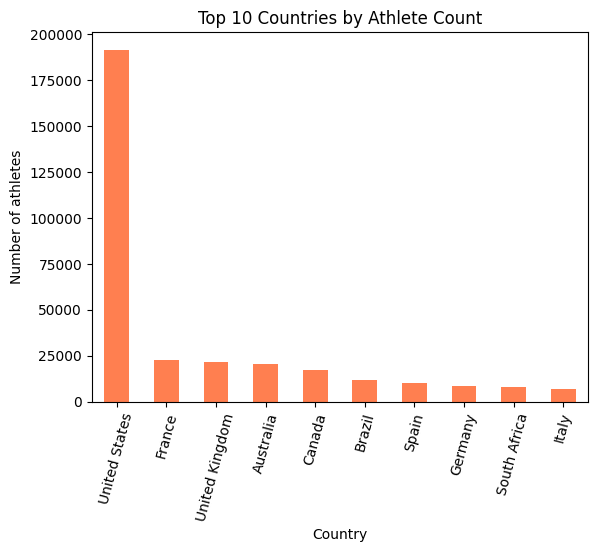

In [7]:
from visualization import graph_country_table
graph_country_table (crossfit_df2)

Aunque este gráfico solo tenga en cuenta a los mejores atletas a nivel mundial, se puede ver claramente como en Estados Unidos reside la gran parte de popularidad de este deporte, ya que, aquí es dónde se celebran la gran mayoría de competiciones y dónde residen la mayoría de atletas.

**Heatmap país–año**

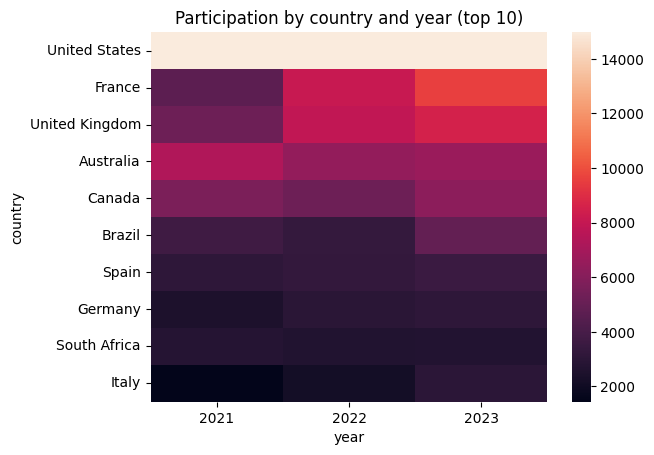

In [4]:
from visualization import heatmap_country
heatmap_country (crossfit_df2)

2. Frecuencia de género.

In [5]:
from visualization import gender_table
gender_table (crossfit_df2)

,gender,athlete_count
0,M,263902
1,F,135440


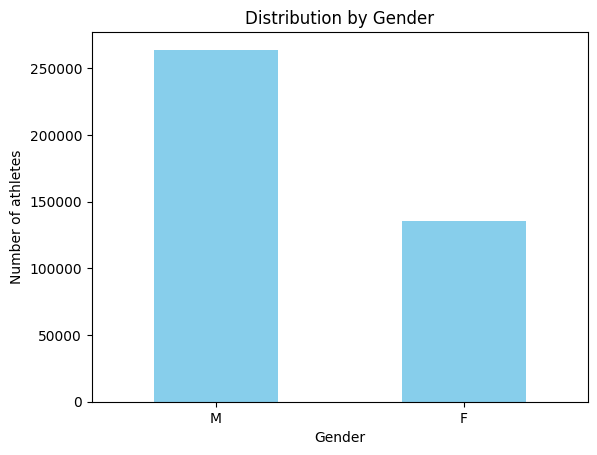

In [6]:
from visualization import graph_gender_table
graph_gender_table (crossfit_df2)

3. Frecuencia por rangos de edad.

In [7]:
from visualization import age_table
age_table (crossfit_df2)

,age_range,athlete_count
0,"[15, 20)",6753
1,"[20, 25)",27456
2,"[25, 30)",72223
3,"[30, 35)",97555
4,"[35, 40)",79962
5,"[40, 45)",58096
6,"[45, 50)",35832
7,"[50, 55)",21465


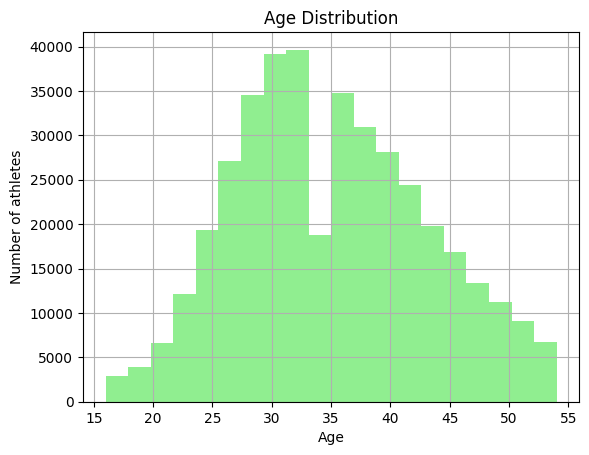

In [10]:
from visualization import graph_age_table
graph_age_table (crossfit_df2)

Histograma de la distribución por edades. Observamos que el rango entre 30 y 35 años es el que más destaca.

En comparación con algunos otros deportes a nivel mundial como el fútbol o el baloncesto, vemos que los atletas de crossfit están en rangos de edad algo superiores.

### Análisis temporal (2021 - 2023)

In [11]:
from visualization import temporary_table
temporary_table (crossfit_df2)

,year,athlete_count
0,2021,127462
1,2022,130306
2,2023,141574


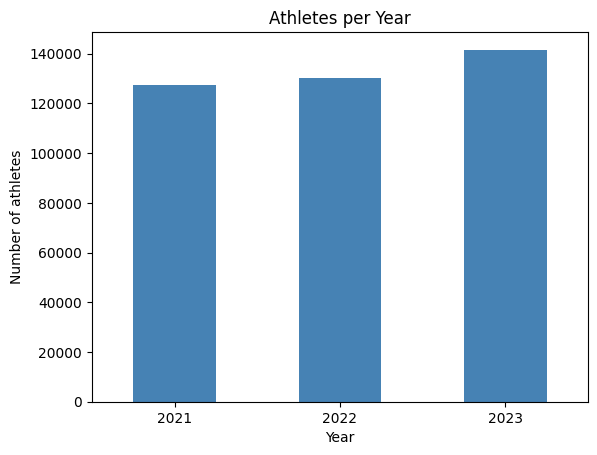

In [12]:
from visualization import graph_temporary
graph_temporary (crossfit_df2)

**Número de atletas por año y país (Top 5 países)**

In [13]:
from visualization import top5_table
top5_table (crossfit_df2)

,country,year,athlete_count
26,Australia,2021,7312
27,Australia,2022,6460
28,Australia,2023,6648
80,Canada,2021,5691
81,Canada,2022,5248
82,Canada,2023,6229
145,France,2021,4683
146,France,2022,8091
147,France,2023,9564
450,United Kingdom,2021,5211


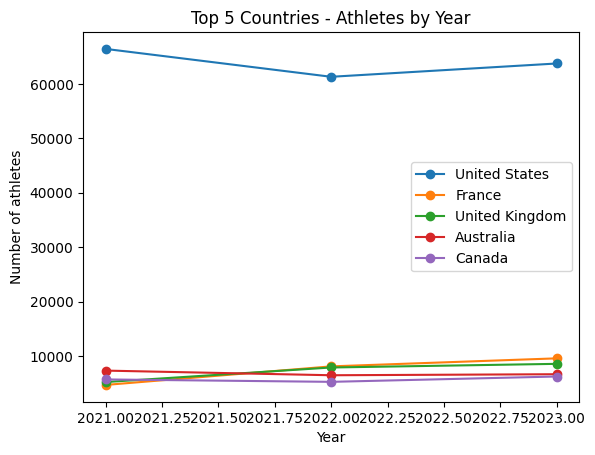

In [14]:
from visualization import top5_graph
top5_graph (crossfit_df2)

**Distribución de edad de los atletas por año y género**


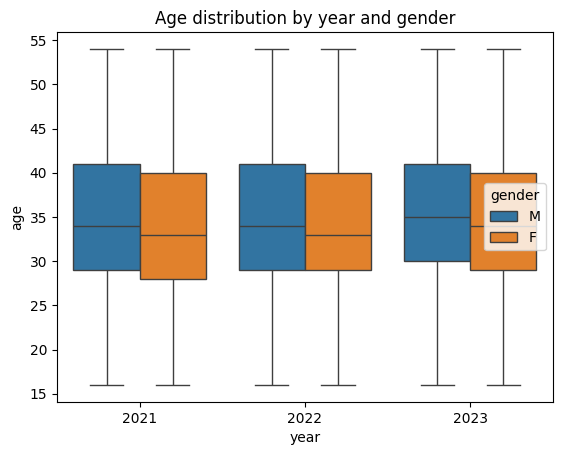

In [15]:
from visualization import age_gender_distribution
age_gender_distribution (crossfit_df2)

**Evolución del número de atletas por año y género**

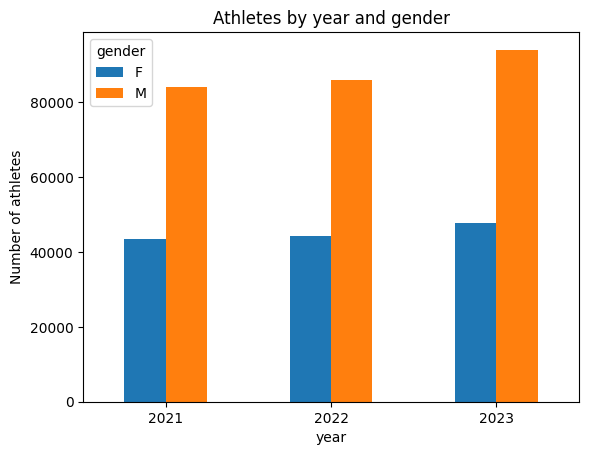

In [16]:
from visualization import gender_year_evolution
gender_year_evolution (crossfit_df2)

### Análisis de rendimiento

Vamos a descubrir a los mejores atletas a nivel mundial para los distintos años.

Voy a filtrar por la competición "games" que como ya he indicado anteriormente es la competición más grande de crossfit a nivel mundial y vamos a ver quién ha participado en ella y quién ha obtenido los mejores resultados.
También vamos a ver los mejores atletas tanto masculinos (M) como femeninos (F).

Para el año 2023 esta base de datos no tiene información sobre el rendimiento de los atletas en la competición "games". Tiene los puestos del ranking con valores nulos y los valores de "score" con valores igual a 0. Por ello voy a realizar este análisis de los mejores atletas en los "games" para los años 2021 y 2022.

In [5]:
from visualization import performance_table
result = performance_table(crossfit_df2)

In [6]:
print("Número de atletas masculinos en Games en 2021")
result["masculino"][2021]

Número de atletas masculinos en Games en 2021


,competitor_name,country,rank
127382,Justin Medeiros,United States,1.0
127383,Patrick Vellner,Canada,2.0
127384,Brent Fikowski,Canada,3.0
127385,Björgvin Karl Guðmundsson,Iceland,4.0
127386,Saxon Panchik,United States,5.0
127387,Jonne Koski,Finland,6.0
127388,Guilherme Malheiros,Brazil,7.0
127389,Alex Vigneault,Canada,8.0
127390,Lazar Đukić,Serbia,9.0
127391,Noah Ohlsen,United States,10.0


In [8]:
print("Número de atletas masculinos en Games en 2022")
result["masculino"][2022]

Número de atletas masculinos en Games en 2022


,competitor_name,country,rank
257688,Justin Medeiros,United States,1.0
257689,Roman Khrennikov,NoCountry,2.0
257690,Ricky Garard,Australia,3.0
257691,Samuel Kwant,United States,4.0
257692,Jeffrey Adler,Canada,5.0
257693,Patrick Vellner,Canada,6.0
257694,Jayson Hopper,United States,7.0
257695,Lazar Đukić,Serbia,8.0
257696,Björgvin Karl Guðmundsson,Iceland,9.0
257697,Guilherme Malheiros,Brazil,10.0


In [9]:
print("Número de atletas femeninos en Games en 2021")
result["femenino"][2021]

Número de atletas femeninos en Games en 2021


,competitor_name,country,rank
127422,Tia-Clair Toomey,Australia,1.0
127423,Laura Horváth,Hungary,2.0
127424,Annie Thorisdottir,Iceland,3.0
127425,Kristin Holte,Norway,4.0
127426,Haley Adams,United States,5.0
127427,Gabriela Migała,Poland,6.0
127428,Mallory O'Brien,United States,7.0
127429,Kristi Eramo O'Connell,United States,8.0
127430,Amanda Barnhart,United States,9.0
127431,Katrin Tanja Davidsdottir,Iceland,10.0


In [10]:
print("Número de atletas femeninos en Games en 2022")
result["femenino"][2022]

Número de atletas femeninos en Games en 2022


,competitor_name,country,rank
257728,Tia-Clair Toomey,Australia,1.0
257729,Mallory O'Brien,United States,2.0
257730,Laura Horvath,Hungary,3.0
257731,Danielle Brandon,United States,4.0
257732,Brooke Wells,United States,5.0
257733,Emma Lawson,Canada,6.0
257734,Kara Saunders,Australia,7.0
257735,Gabriela Migała,Poland,8.0
257736,Haley Adams,United States,9.0
257737,Alexis Raptis,United States,10.0


**Gráfica que representa el top 10 de atletas masculinos en games en 2022**

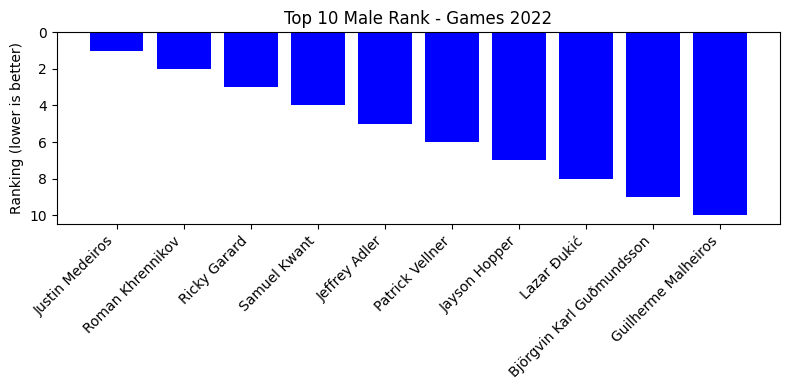

In [6]:
from visualization import top_m_games_2022, top_f_games_2022, performance_table
result = performance_table(crossfit_df2)

df_m_2022 = result["masculino"][2022]
top_m_games_2022(df_m_2022)

**Gráfica que representa el top 10 de atletas femeninos en games en 2022**

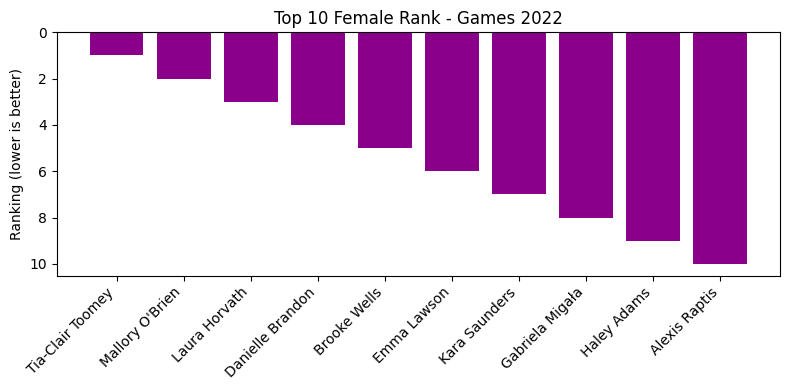

In [7]:
df_f_2022 = result["femenino"][2022]
top_f_games_2022(df_f_2022)

Para el año 2023 si tenemos información sobre el rendimiento de los atletas en las competiciones de "open", asi que vamos a ver cuáles fueron los mejores atletas masculinos y femeninos en estas pruebas ordenándolos por ranking.

In [12]:
from visualization import top_open_2023_table
top_m_2023, top_f_2023 = top_open_2023_table(crossfit_df2)

In [13]:
print("Top 10 atletas masculinos en Open 2023")
top_m_2023

Top 10 atletas masculinos en Open 2023


,competitor_name,country,gender,rank,height_cm,weight_kg
257768,Jeffrey Adler,Canada,M,1.0,176.0,90.0
257769,Tola Morakinyo,United States,M,2.0,183.0,97.0
257770,Colten Mertens,United States,M,3.0,163.0,82.0
257771,Tyler Christophel,United States,M,4.0,178.0,89.0
257772,Roldan Goldbaum,Mexico,M,5.0,170.0,86.0
257773,Samuel Cournoyer,Canada,M,6.0,180.0,93.0
257774,Ricky Garard,Australia,M,7.0,179.0,93.0
257775,Dallin Pepper,United States,M,8.0,183.0,98.0
257776,Reggie Fasa,United Kingdom,M,9.0,174.0,93.0
257777,Cam Crockett,United States,M,10.0,176.0,89.0


In [14]:
print("Top 10 atletas femeninos en Open 2023")
top_f_2023

Top 10 atletas femeninos en Open 2023


,competitor_name,country,gender,rank,height_cm,weight_kg
345583,Mallory O'Brien,United States,F,1.0,161.0,62.0
345584,Paige Powers,United States,F,2.0,163.0,71.0
345585,Emma Lawson,Canada,F,3.0,166.0,64.0
345586,Arielle Loewen,United States,F,4.0,161.0,69.0
345587,Alex Gazan,United States,F,5.0,168.0,69.0
345588,Brooke Wells,United States,F,6.0,168.0,69.0
345589,Elena Carratala Sanahuja,Spain,F,7.0,164.0,63.0
345590,Amanda Barnhart,United States,F,8.0,171.0,73.0
345591,Ellie Turner,Australia,F,9.0,167.0,72.0
345592,Zoe Warren,United States,F,10.0,155.0,64.0


**Relación altura/rendimiento para atletas en Open 2023**

1. Masculinos

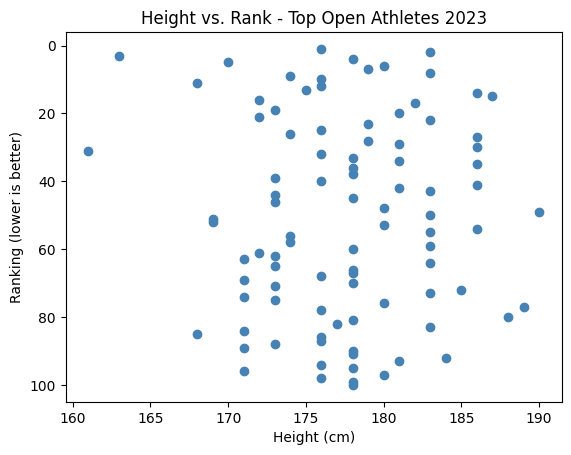

In [4]:
from visualization import height_vs_rank_m
height_vs_rank_m (crossfit_df2)

2. Femeninos

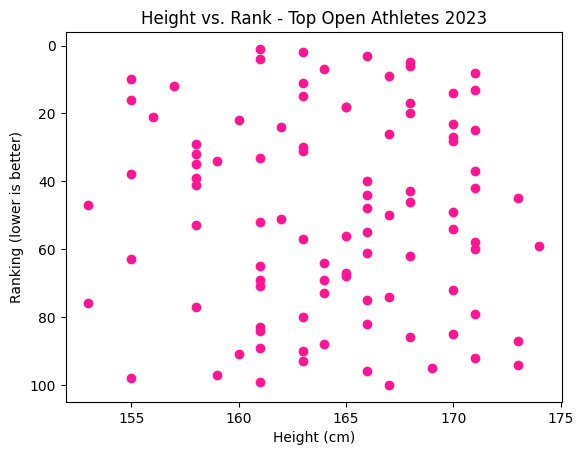

In [5]:
from visualization import height_vs_rank_f
height_vs_rank_f (crossfit_df2)

En estos gráficos de dispersión que representan los 100 mejores atletas en las pruebas de Open en el año 2023 podemos observar que la altura no es una variable determinante en este deporte, ya que, tanto atletas de más baja estatura como otros de mayor altura pueden competir para ser los mejores.

Aunque lo mejor siempre será contar con una altura equilibrada.

**Relación peso/rendimiento para atletas en Open 2023**

1. Masculinos

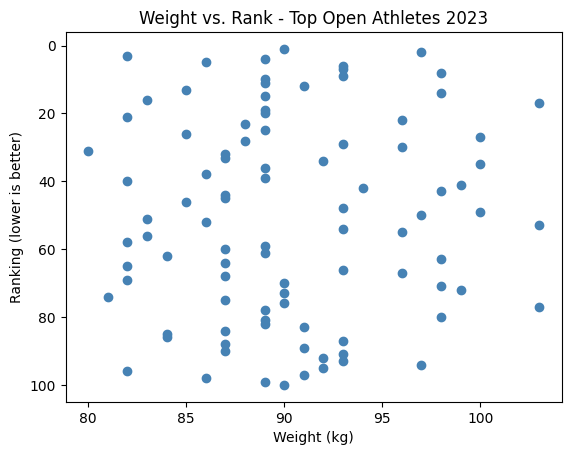

In [6]:
from visualization import weight_vs_rank_m
weight_vs_rank_m (crossfit_df2)

2. Femeninos

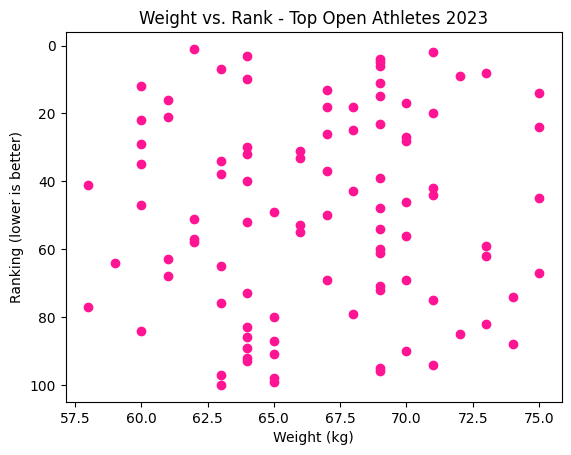

In [7]:
from visualization import weight_vs_rank_f
weight_vs_rank_f (crossfit_df2)

En estos gráficos de dispersión que representan los 100 mejores atletas en las pruebas de Open en el año 2023 podemos observar que el peso es bastante elevado en atletas de este nivel, sobretodo en los hombres, ya que, ninguno de ellos prácticamente tiene un peso por debajo de 80 kilogramos.

En las mujeres el peso corporal si que está algo más equilibrado aunque la gran mayoría también cuenta con un peso elevado.

**Relación edad/rendimiento para atletas en Open 2023**

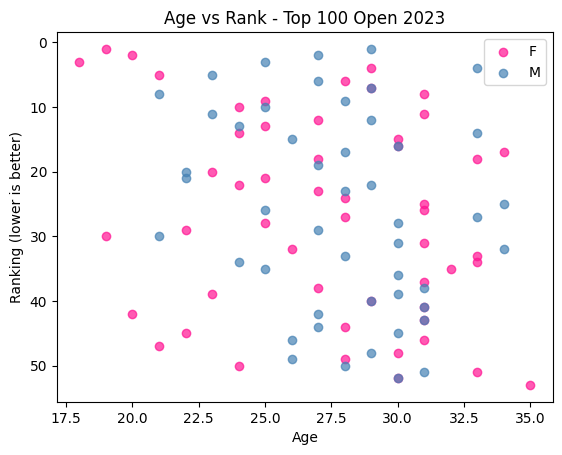

In [4]:
from visualization import age_vs_rank
age_vs_rank (crossfit_df2)

Relación entre la edad y el rendimiento de los 100 mejores atletas de Open en 2023 diferenciado por género.